In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/imdb-top-5000-tv-shows/imdb_top_5000_tv_shows.csv')
df.head()


,tconst,primaryTitle,startYear,endYear,rank,averageRating,numVotes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0903747,Breaking Bad,2008,2013.0,1,9.5,2355161,"Michelle MacLaren, Adam Bernstein, Vince Gilli...","Vince Gilligan, Peter Gould, George Mastras, S...","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0903747""...","<a href=""https://www.imdb.com/title/tt0903747""..."
1,tt0185906,Band of Brothers,2001,2001.0,2,9.4,566247,"David Frankel, Mikael Salomon, Tom Hanks, Davi...","Stephen Ambrose, Erik Bork, E. Max Frye, Tom H...","Action, Drama, History","<a href=""https://www.imdb.com/title/tt0185906""...","<a href=""https://www.imdb.com/title/tt0185906""..."
2,tt7366338,Chernobyl,2019,2019.0,3,9.3,959727,Johan Renck,Craig Mazin,"Drama, History, Thriller","<a href=""https://www.imdb.com/title/tt7366338""...","<a href=""https://www.imdb.com/title/tt7366338""..."
3,tt0417299,Avatar: The Last Airbender,2005,2008.0,4,9.3,410185,"Giancarlo Volpe, Ethan Spaulding, Lauren MacMu...","Michael Dante DiMartino, Bryan Konietzko, Aaro...","Action, Adventure, Animation","<a href=""https://www.imdb.com/title/tt0417299""...","<a href=""https://www.imdb.com/title/tt0417299""..."
4,tt0795176,Planet Earth,2006,2006.0,5,9.4,228230,"Alastair Fothergill, Mark Linfield","David Attenborough, Vanessa Berlowitz, Alastai...","Documentary, Family","<a href=""https://www.imdb.com/title/tt0795176""...","<a href=""https://www.imdb.com/title/tt0795176""..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   endYear          4136 non-null   float64
 4   rank             5000 non-null   int64  
 5   averageRating    5000 non-null   float64
 6   numVotes         5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          5000 non-null   object 
 9   genres           4998 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


In [4]:
df.isnull().sum()
df.describe()

,startYear,endYear,rank,averageRating,numVotes
count,5000.000000,4136.000000,5000.000000,5000.000000,5.000000e+03
mean,2009.087400,2010.668037,2500.500000,7.999220,2.776296e+04
std,14.379135,13.874208,1443.520003,0.438976,9.185739e+04
min,1948.000000,1953.000000,1.000000,7.300000,6.120000e+02
25%,2004.000000,2005.000000,1250.750000,7.600000,2.191000e+03
50%,2014.000000,2016.000000,2500.500000,7.900000,5.339500e+03
75%,2019.000000,2020.000000,3750.250000,8.300000,1.738625e+04
max,2025.000000,2026.000000,5000.000000,9.900000,2.451483e+06


In [6]:
df['genres'] = df['genres'].fillna('Unknown')
df['endYear'] = df['endYear'].fillna(2025).astype(int)
df['duration'] = df['endYear'] - df['startYear']

## EDA

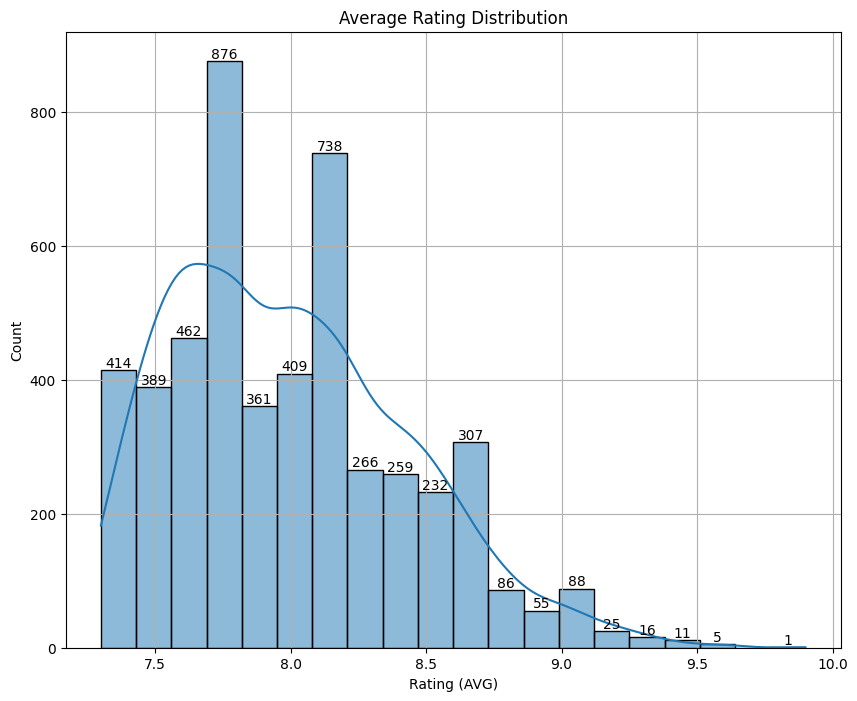

In [5]:
plt.figure(figsize=(10,8))
avgrat= sns.histplot(df['averageRating'], bins=20, kde=True)
plt.title('Average Rating Distribution')
plt.xlabel('Rating (AVG)')
plt.ylabel('Count')
for p in avgrat.patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width()/2., height,
                 int(height), ha='center', va='bottom')
plt.grid()
plt.show()

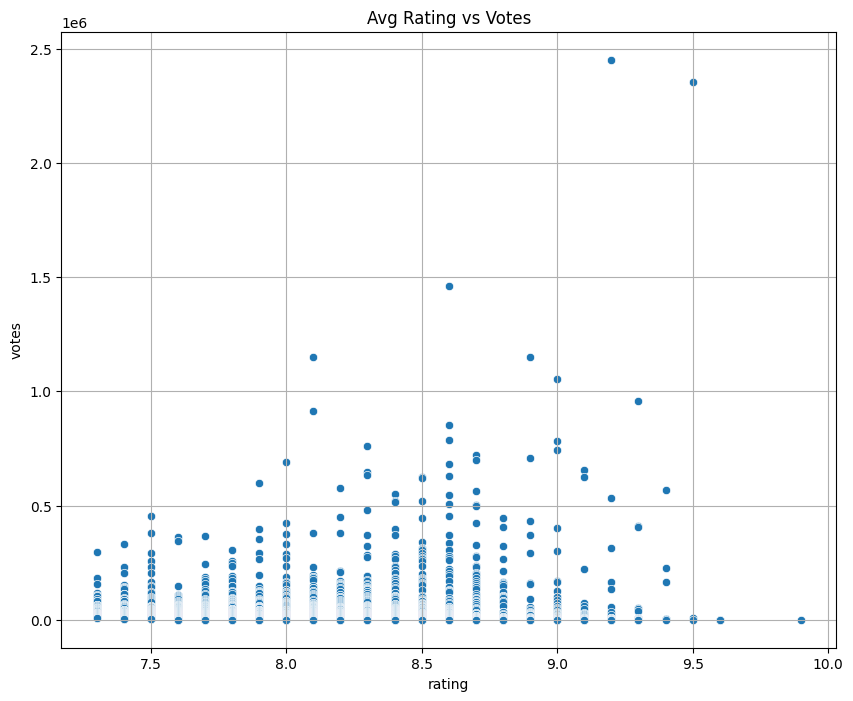

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='averageRating',y='numVotes',data=df)
plt.title('Avg Rating vs Votes')
plt.xlabel('rating')
plt.ylabel('votes')
plt.grid()
plt.show()

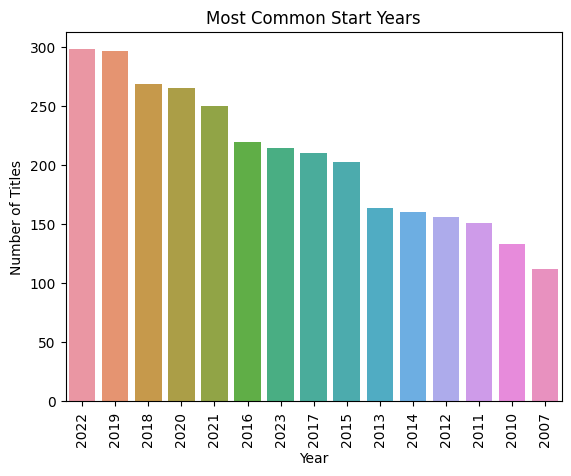

In [8]:
sns.countplot(x='startYear', data=df, order=df['startYear'].value_counts().head(15).index)
plt.xticks(rotation=90)
plt.title('Most Common Start Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


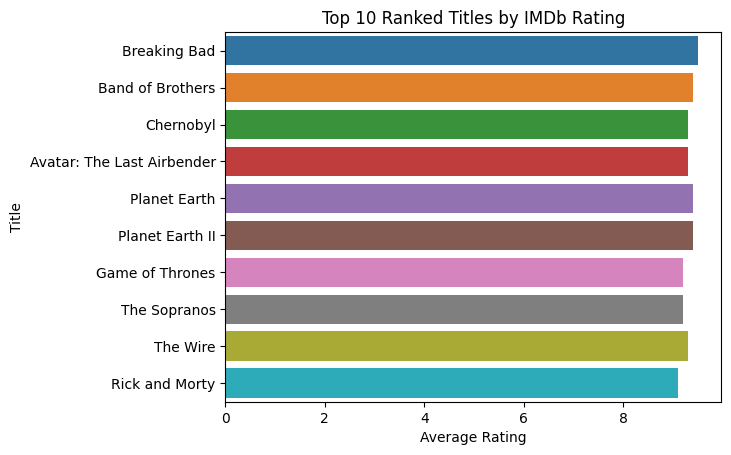

In [9]:
top_ranked = df.sort_values('rank').head(10)
sns.barplot(x='averageRating', y='primaryTitle', data=top_ranked)
plt.title('Top 10 Ranked Titles by IMDb Rating')
plt.xlabel('Average Rating')
plt.ylabel('Title')
plt.show()


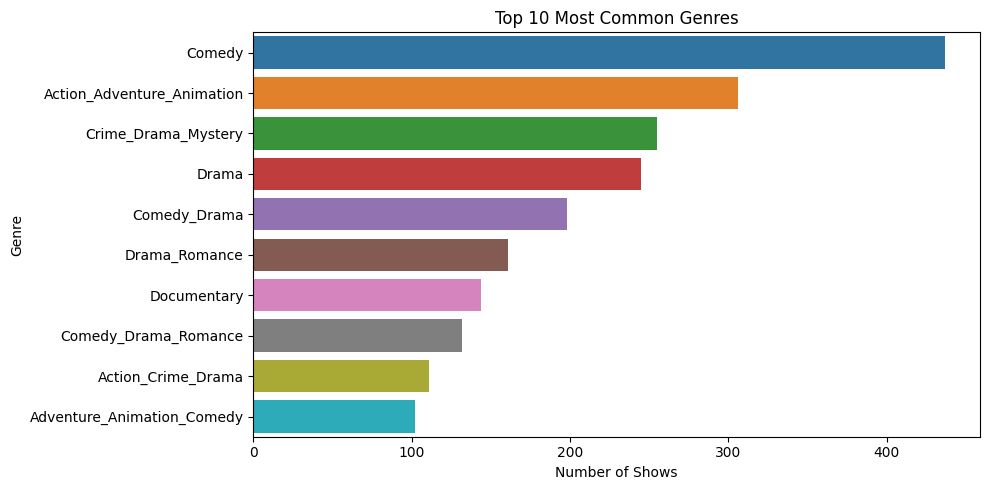

In [12]:
genre_list = df['genres'].str.split(',', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_list.values, y=genre_list.index)
plt.xlabel("Number of Shows")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres")
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()

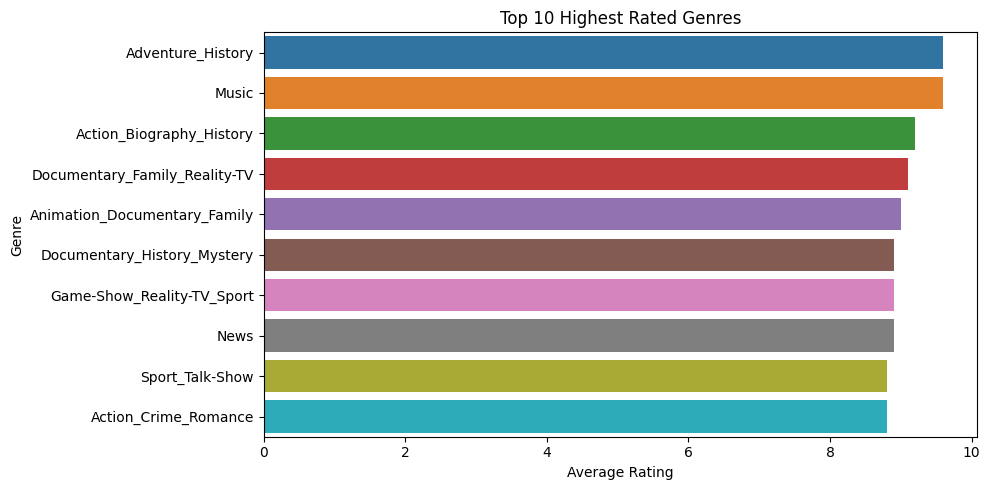

In [13]:
avg_rating_by_genre = df.assign(genre=df['genres'].str.split(',')).explode('genre')
avg_rating = avg_rating_by_genre.groupby('genre')['averageRating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Top 10 Highest Rated Genres")
plt.tight_layout()
plt.savefig('top_rated_genres.png')
plt.show()

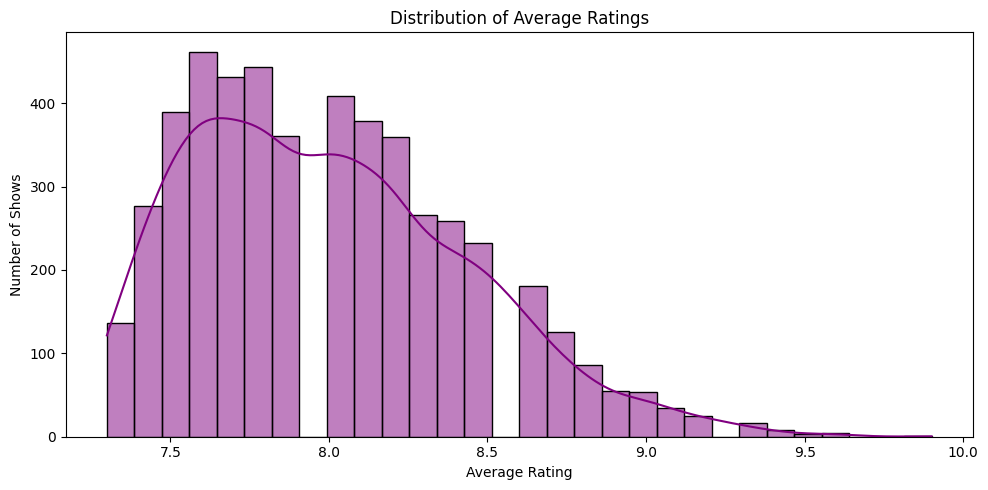

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['averageRating'], bins=30, kde=True, color='purple')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.show()

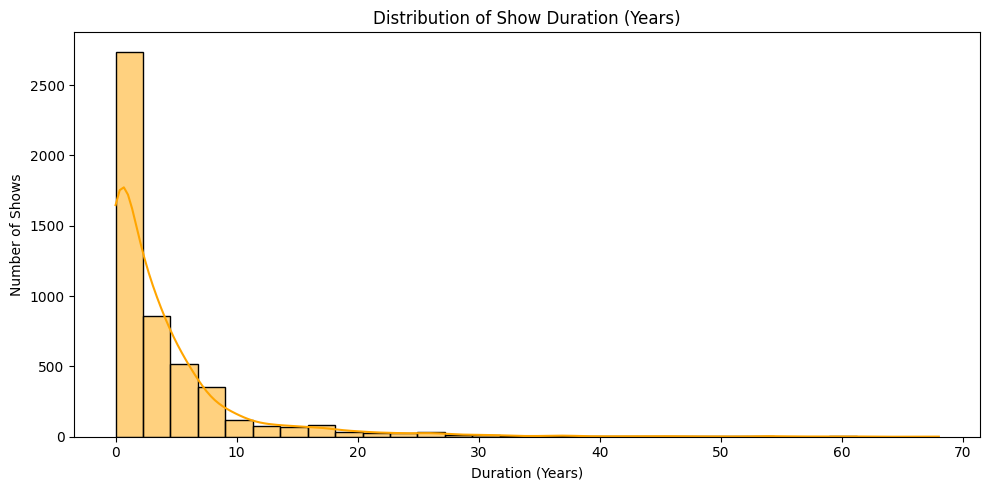

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=30, kde=True, color='orange')
plt.title("Distribution of Show Duration (Years)")
plt.xlabel("Duration (Years)")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('show_duration.png')
plt.show()

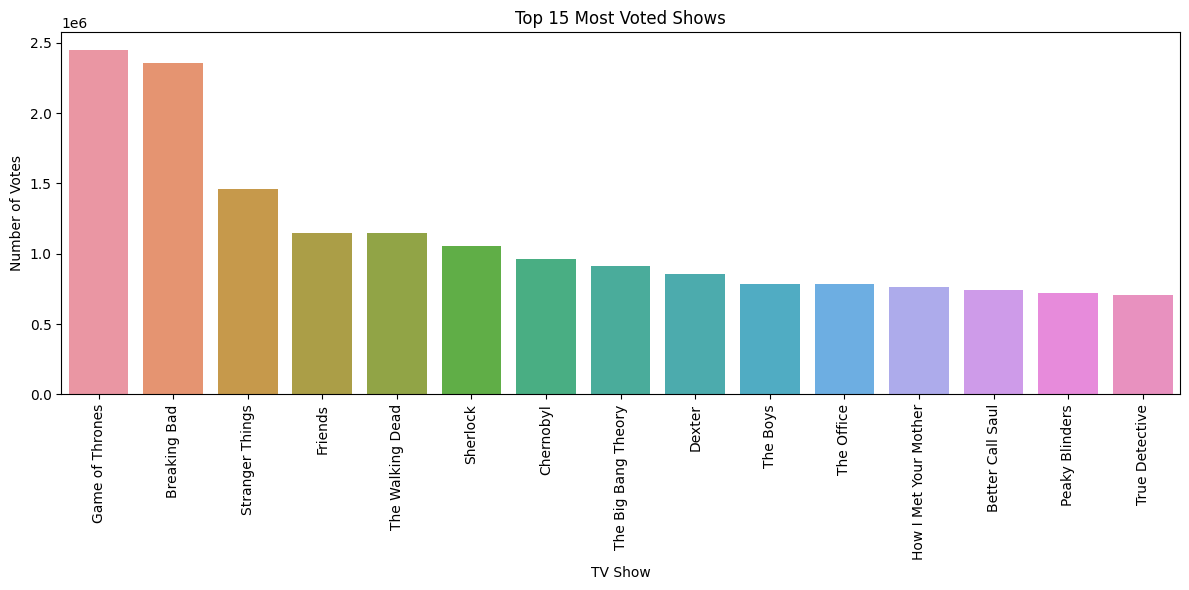

In [16]:
plt.figure(figsize=(12, 6))
top_voted = df.sort_values('numVotes', ascending=False).head(15)
sns.barplot(x=top_voted['primaryTitle'], y=top_voted['numVotes'])
plt.xticks(rotation=90)
plt.title("Top 15 Most Voted Shows")
plt.xlabel("TV Show")
plt.ylabel("Number of Votes")
plt.tight_layout()
plt.savefig('top_voted_shows.png')
plt.show()

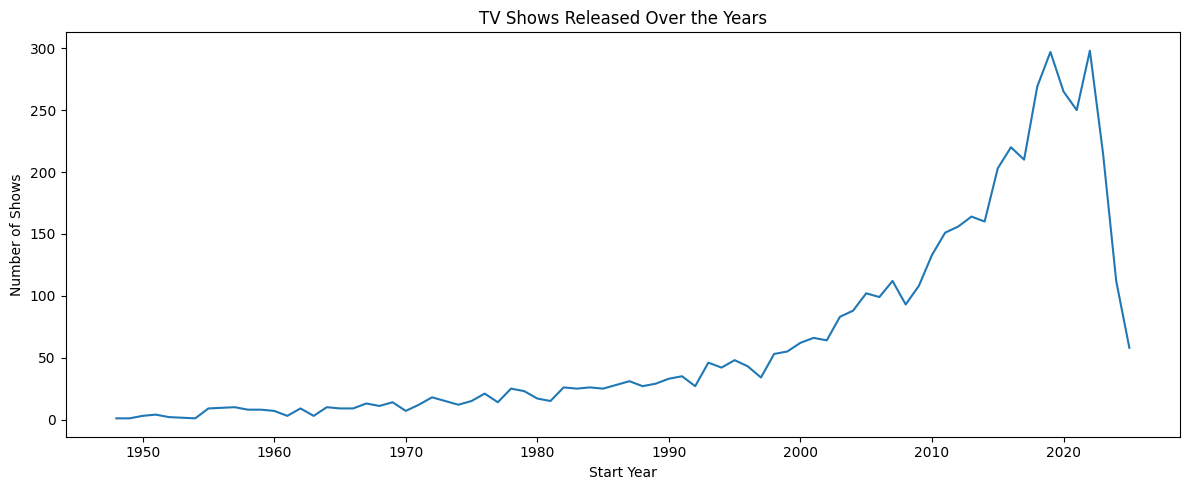

In [18]:
plt.figure(figsize=(12, 5))
df['startYear'].value_counts().sort_index().plot(kind='line')
plt.title("TV Shows Released Over the Years")
plt.xlabel("Start Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig('shows_by_year.png')
plt.show()